## Titanic is one of the most big disaster in the history in 1912. It sank after hitting the iceberg. 2224 passengers and employees are died.

In [673]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import os
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [674]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
test_PassengerID=test_df['PassengerId']

In [675]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,A/5 21171,7.250000000000000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,PC 17599,71.283299999999997,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,STON/O2. 3101282,7.925000000000000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,113803,53.100000000000001,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,373450,8.050000000000001,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000000000000,0,0,211536,13.000000000000000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000000000000,0,0,112053,30.000000000000000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.449999999999999,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000000000000,0,0,111369,30.000000000000000,C148,C


In [676]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

*PassengerID* = number of passengers

*Survived* = 1:Survived person 0: Died person

*Pclass* = Passenger class, 1,2 and 3 classes.

*Sex* = Gender of passengers.

*SibSp* = Sibling or suppouse numbers.

*Parch* = Parents and children numbers.

*Fare* = Price of ticket.

*Embarked* = C, Q and S ports which is embarked ship.

There are total 12 columns.

In [677]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,A/5 21171,7.250000000000000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,PC 17599,71.283299999999997,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,STON/O2. 3101282,7.925000000000000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,113803,53.100000000000001,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,373450,8.050000000000001,NaN,S


In [678]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000000000000,0,0,211536,13.000000000000000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000000000000,0,0,112053,30.000000000000000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.449999999999999,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000000000000,0,0,111369,30.000000000000000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000000000000,0,0,370376,7.750000000000000,NaN,Q


In [679]:
print("There are ratios of nun values:")
print("--"*30)
train_df.isnull().sum()*100/train_df.shape[0]

There are ratios of nun values:
------------------------------------------------------------


PassengerId    0.000000000000000
Survived       0.000000000000000
Pclass         0.000000000000000
Name           0.000000000000000
Sex            0.000000000000000
Age           19.865319865319865
SibSp          0.000000000000000
Parch          0.000000000000000
Ticket         0.000000000000000
Fare           0.000000000000000
Cabin         77.104377104377107
Embarked       0.224466891133558
dtype: float64

Cabin column has so much null value. We can drop this column because of manuplating data.

We can drop *PassengerId*, *Cabin* and *Ticket* columns.

In [680]:
train_df.drop(labels = ["PassengerId", "Ticket", "Cabin"], axis = 1, inplace = True)

In [681]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

There are 9 columns, now.

In [682]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,7.250000000000000,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,71.283299999999997,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,7.925000000000000,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,53.100000000000001,S
4,0,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,8.050000000000001,S


In [683]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000000000000,891.000000000000000,714.000000000000000,891.000000000000000,891.000000000000000,891.000000000000000
mean,0.383838383838384,2.308641975308642,29.699117647058820,0.523007856341190,0.381593714927048,32.204207968574600
std,0.486592454264858,0.836071240977051,14.526497332334044,1.102743432293428,0.806057221129956,49.693428597180905
min,0.000000000000000,1.000000000000000,0.420000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,0.000000000000000,2.000000000000000,20.125000000000000,0.000000000000000,0.000000000000000,7.910400000000000
50%,0.000000000000000,3.000000000000000,28.000000000000000,0.000000000000000,0.000000000000000,14.454200000000000
75%,1.000000000000000,3.000000000000000,38.000000000000000,1.000000000000000,0.000000000000000,31.000000000000000
max,1.000000000000000,3.000000000000000,80.000000000000000,8.000000000000000,6.000000000000000,512.329200000000014


=>>> mean and %50 value of Age are so similar. There is no skewed distribution.

=>>> mean and %50 value of Fare are not so similar. There is a skewed distribution.

In [684]:
# show the overall survival rate, as the standard when choosing the fts
print('Overall Survival Ratio: %{}'.format(round(train_df['Survived'].mean()*100,2)))

Overall Survival Ratio: %38.38


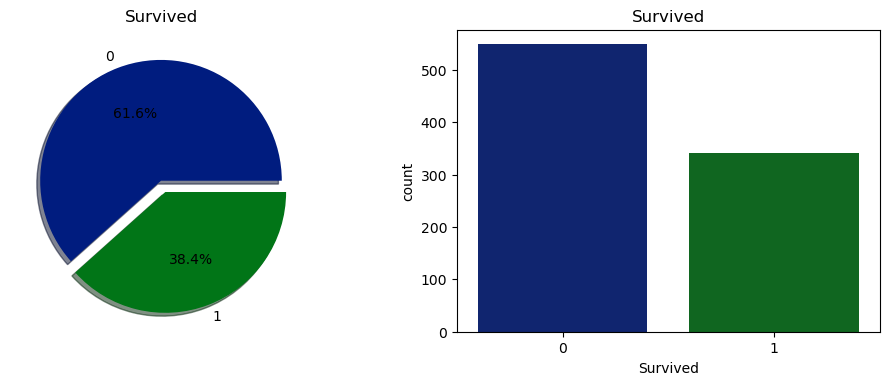

In [685]:
f,ax=plt.subplots(1,2,figsize=(12,4))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

% 38,4 of passengers are survived, % 61,6 of passengers died.

In [686]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Dataset has 2 float64, 4 int64, 3 string column dtype.

Age and Embarked columns have missing values.

In [687]:
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

177 Age and 2 Embarked values.

For dividing categorical and numerical values:

In [688]:
train_df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

**Categorical Variable Analysis** : Survived, Pclass, Sex, SibsSp, Parch, Embarked, Name

**Numerical Variable Analysis** : Age, Fare

### Categorical Variable Analysis- Visualize

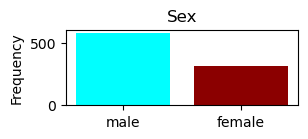

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


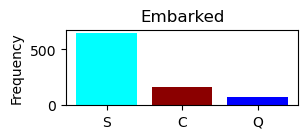

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


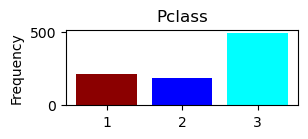

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


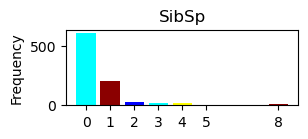

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [689]:
def bar_plot(i):
    var= train_df[i]
    varValue=var.value_counts()
    plt.figure(figsize=(3,1))
    plt.bar(varValue.index, varValue, color=["cyan", "darkred", "blue", "yellow"])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(i)
    plt.show()
    print('{}: \n {}'.format(i,varValue))
Firstcategory=[ 'Sex', 'Embarked', 'Pclass', 'SibSp']
for c in Firstcategory:
    bar_plot(c)

### Numerical Variable Analysis - Visualize

Text(0.5, 1.0, 'Age')

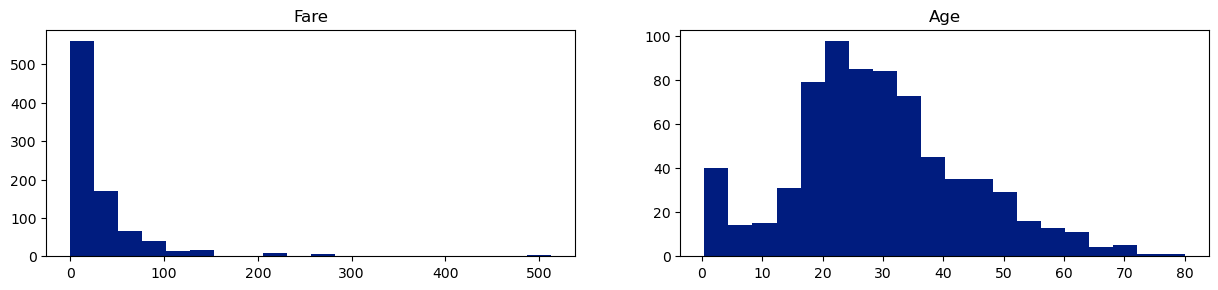

In [690]:
plt.figure(figsize = (15,3))
plt.subplot(1,2,1)
plt.hist(train_df['Fare'], bins=20)
plt.title("Fare")
plt.subplot(1,2,2)
plt.hist(train_df['Age'], bins=20)
plt.title("Age")

=>>> Age likes positively skewed

In [691]:
print('Highest Fare was: {} Euro.'.format(round(train_df['Fare'].max())))
print('Lowest Fare was: {} Euro.'.format(round(train_df['Fare'].min())))
print('Average Fare was: {} Euro.'.format(round(train_df['Fare'].mean())))

Highest Fare was: 512 Euro.
Lowest Fare was: 0 Euro.
Average Fare was: 32 Euro.


#### Survived and Pclass

In [692]:
#Pclass vs Survived
print(train_df[['Pclass', 'Survived']].head(10))
print("Survived people ratio groupby Pclass: \n", train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       3         0
1       1         1
2       3         1
3       1         1
4       3         0
5       3         0
6       1         0
7       3         0
8       3         1
9       2         1
Survived people ratio groupby Pclass: 
    Pclass          Survived
0       1 0.629629629629630
1       2 0.472826086956522
2       3 0.242362525458248


*Ratio of survived passenger is the most value in 1.pclass.*

#### Survived vs Sex

In [693]:
#Survived people ratio groupby Sex:
print(train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

      Sex          Survived
0  female 0.742038216560510
1    male 0.188908145580589


*Number of survived female passengers are more than survived male passenger.*

#### Survived vs SibSp

In [694]:
#Survived people ratio groupby Siblings/Spouse :
sursibsp=train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sursibsp

,SibSp,Survived
1,1,0.535885167464115
2,2,0.464285714285714
0,0,0.345394736842105
3,3,0.250000000000000
4,4,0.166666666666667
5,5,0.000000000000000
6,8,0.000000000000000


*Passengers who have 1 sibling/suppose have the most value of survived rate. Passengers that have 5 or 8 sibsp are not survived or there is no possibility of having sibsp.*

#### Survived vs Parch

In [695]:
#Survived people ratio groupby Parch ( Parent or children) : 
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000000000000
1,1,0.550847457627119
2,2,0.500000000000000
0,0,0.343657817109145
5,5,0.200000000000000
4,4,0.000000000000000
6,6,0.000000000000000


*If a passenger has 3 children or parents, the survived rate is highest.*

# 1. MISSING VALUES

**Find and fill the missing value:**

In [696]:
#Finding missing values:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Embarked'], dtype='object')

In [697]:
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000000000000,-0.338481035961016,-0.077221094572177,-0.035322498885736,0.081629407083482,0.257306522384962
Pclass,-0.338481035961016,1.000000000000000,-0.369226015315516,0.083081362845687,0.018442671310748,-0.549499619943906
Age,-0.077221094572177,-0.369226015315516,1.000000000000000,-0.308246758923657,-0.189119262632035,0.096066691769039
SibSp,-0.035322498885736,0.083081362845687,-0.308246758923657,1.000000000000000,0.414837698620153,0.159651043242161
Parch,0.081629407083482,0.018442671310748,-0.189119262632035,0.414837698620153,1.000000000000000,0.216224944770763
Fare,0.257306522384962,-0.549499619943906,0.096066691769039,0.159651043242161,0.216224944770763,1.000000000000000


# 1.1. Embarked missing values

In [698]:
#Embarked missing
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.000000000000000,0,0,80.000000000000000,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000000000000000,0,0,80.000000000000000,NaN


We have 1 Pclass. Pclass has the most correlation factor is 0.558629 with Fare.

<Figure size 1500x500 with 0 Axes>

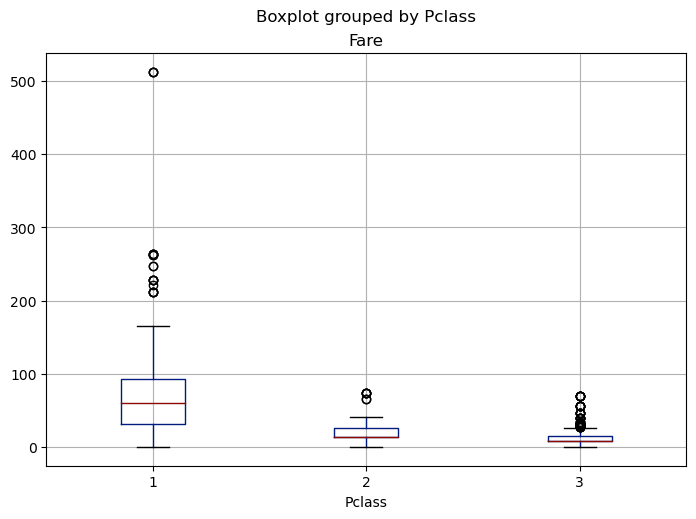

In [699]:
plt.figure(figsize=(15,5))
train_df.boxplot(column='Fare', by='Pclass')
plt.show()

1 P class tickets need higher fare amounts.

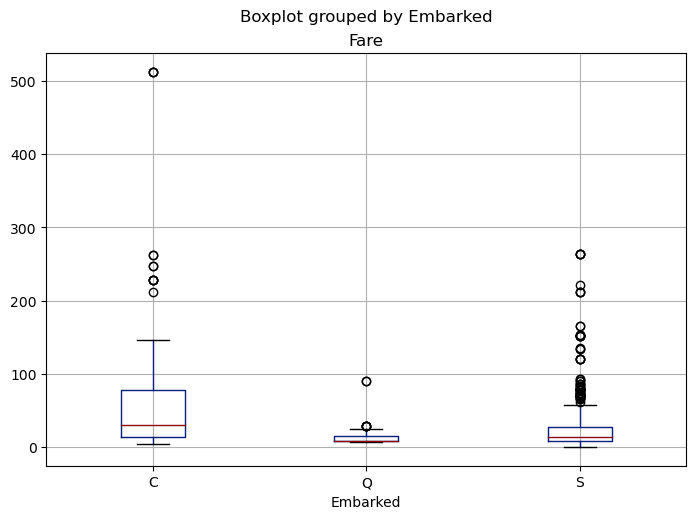

In [700]:
train_df.boxplot(column='Fare', by='Embarked')
plt.show()

C embarked has highest fare and so 1 pclass. So, null is filled by "C".

In [701]:
train_df['Embarked']= train_df['Embarked'].fillna('C')
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


### Embarkeds vs Sex, Survived and Fare

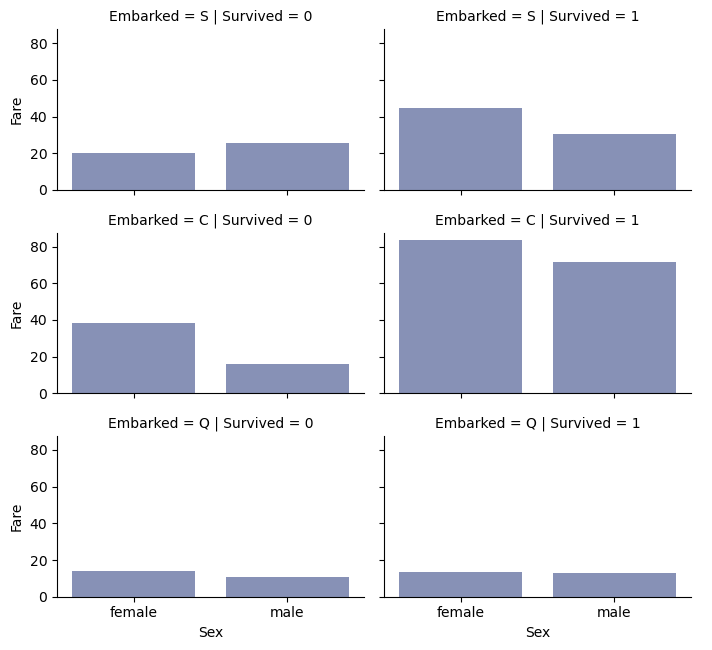

In [702]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

The highest amount of fare is billed for a survived female from C embarked.

## Sex get.dummies

We can use get.dummies method for Sex column

In [703]:
train_df= pd.concat([train_df, pd.get_dummies(train_df["Sex"])], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,7.250000000000000,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,71.283299999999997,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,7.925000000000000,S,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,53.100000000000001,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,8.050000000000001,S,0,1


In [704]:
train_df.drop(labels = ["Sex"], axis = 1, inplace = True)

## Embarked get.dummies

In [705]:
train_df= pd.concat([train_df, pd.get_dummies(train_df["Embarked"])], axis=1)
train_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",22.000000000000000,1,0,7.250000000000000,S,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000000000000,1,0,71.283299999999997,C,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.000000000000000,0,0,7.925000000000000,S,1,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000000000000,1,0,53.100000000000001,S,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",35.000000000000000,0,0,8.050000000000001,S,0,1,0,0,1


# 1.2. Age missing values

In [706]:
#Age missing
train_df[train_df['Age'].isnull()]

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
5,0,3,"Moran, Mr. James",nan,0,0,8.458299999999999,Q,0,1,0,1,0
17,1,2,"Williams, Mr. Charles Eugene",nan,0,0,13.000000000000000,S,0,1,0,0,1
19,1,3,"Masselmani, Mrs. Fatima",nan,0,0,7.225000000000000,C,1,0,1,0,0
26,0,3,"Emir, Mr. Farred Chehab",nan,0,0,7.225000000000000,C,0,1,1,0,0
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",nan,0,0,7.879200000000000,Q,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",nan,0,0,7.229200000000000,C,0,1,1,0,0
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",nan,8,2,69.549999999999997,S,1,0,0,0,1
868,0,3,"van Melkebeke, Mr. Philemon",nan,0,0,9.500000000000000,S,0,1,0,0,1
878,0,3,"Laleff, Mr. Kristo",nan,0,0,7.895800000000000,S,0,1,0,0,1


We can fill age with mean value of groupby Pclass and SibSp columns. Because correlation factors are the most these two variables between Age.

In [707]:
train_df['Age'] = train_df['Age'].groupby([train_df['Pclass'], train_df['SibSp']]).apply(lambda x: x.fillna(x.mean()))

## Pclass get dummies

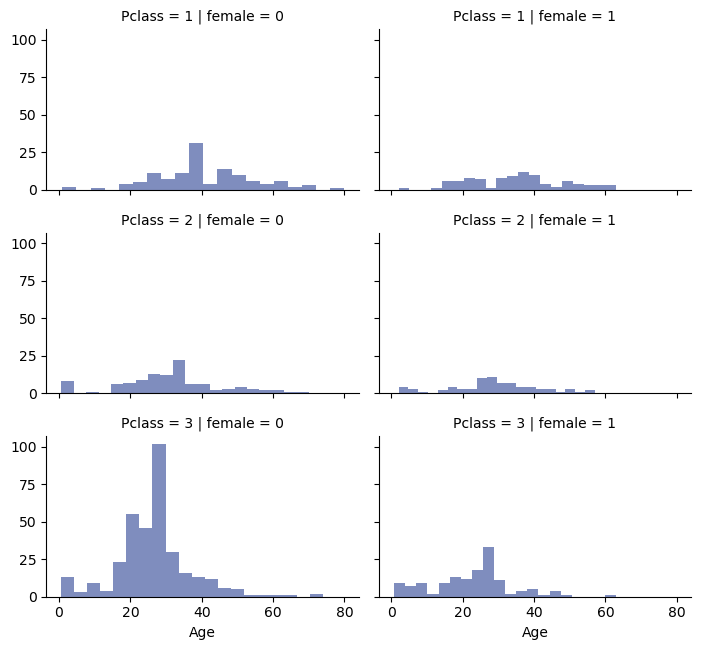

In [708]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='female', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [709]:
train_df= pd.concat([train_df, pd.get_dummies(train_df["Pclass"])], axis=1)

In [710]:
train_df.drop(labels = ["Pclass"], axis = 1, inplace = True)
train_df.head()

,Survived,Name,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S,1,2,3
0,0,"Braund, Mr. Owen Harris",22.000000000000000,1,0,7.250000000000000,S,0,1,0,0,1,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000000000000,1,0,71.283299999999997,C,1,0,1,0,0,1,0,0
2,1,"Heikkinen, Miss. Laina",26.000000000000000,0,0,7.925000000000000,S,1,0,0,0,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000000000000,1,0,53.100000000000001,S,1,0,0,0,1,1,0,0
4,0,"Allen, Mr. William Henry",35.000000000000000,0,0,8.050000000000001,S,0,1,0,0,1,0,0,1


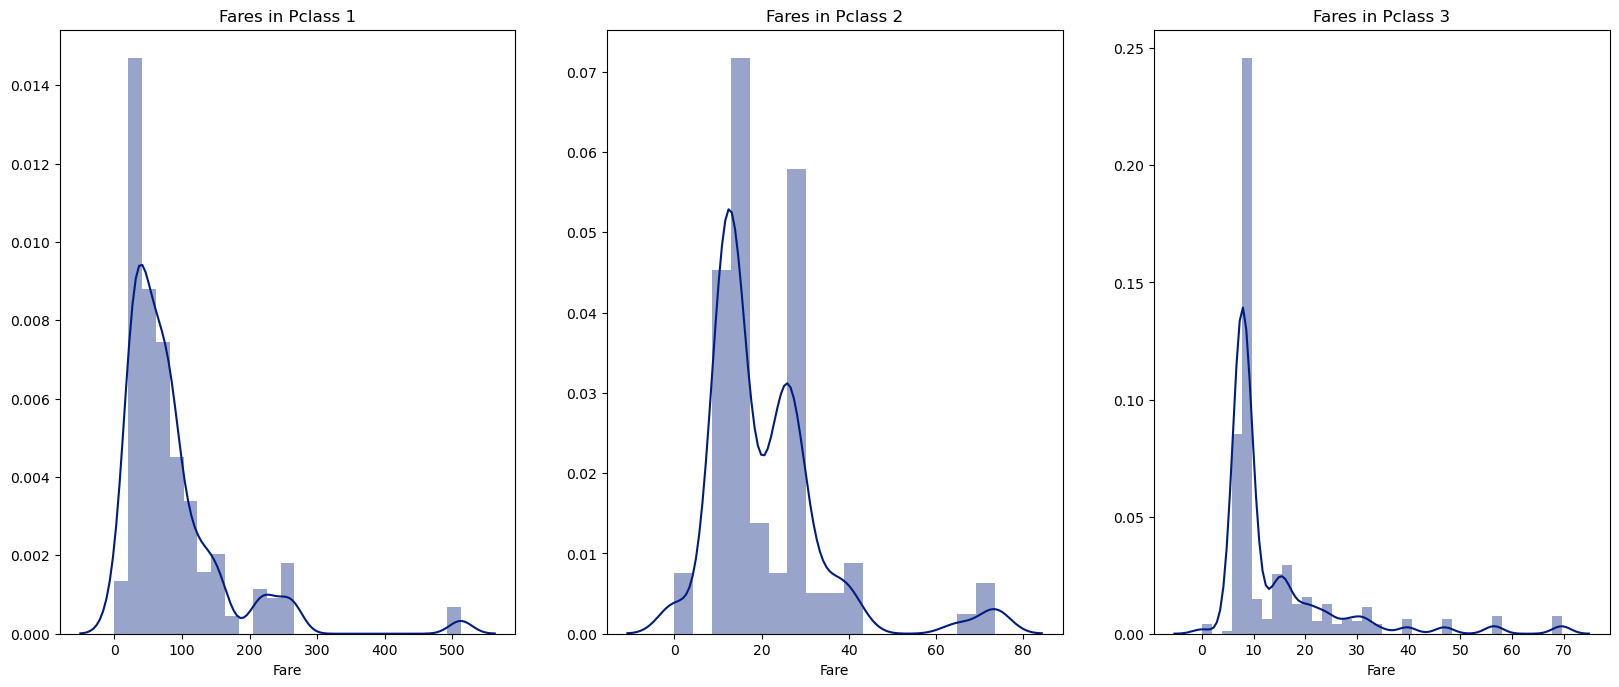

In [711]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train_df[train_df[1]==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train_df[train_df[2]==1].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train_df[train_df[3]==1].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

In [712]:
print("{} Euro is mean amount of fare for 1.Pclass".format(np.median(train_df[train_df[1]==1].Fare)))
print("{} Euro is mean amount of fare for 2.Pclass".format(round(np.median(train_df[train_df[2]==1].Fare))))
print("{} Euro is mean amount of fare for 3.Pclass".format(np.median(train_df[train_df[3]==1].Fare)))

60.287499999999994 Euro is mean amount of fare for 1.Pclass
14.0 Euro is mean amount of fare for 2.Pclass
8.05 Euro is mean amount of fare for 3.Pclass


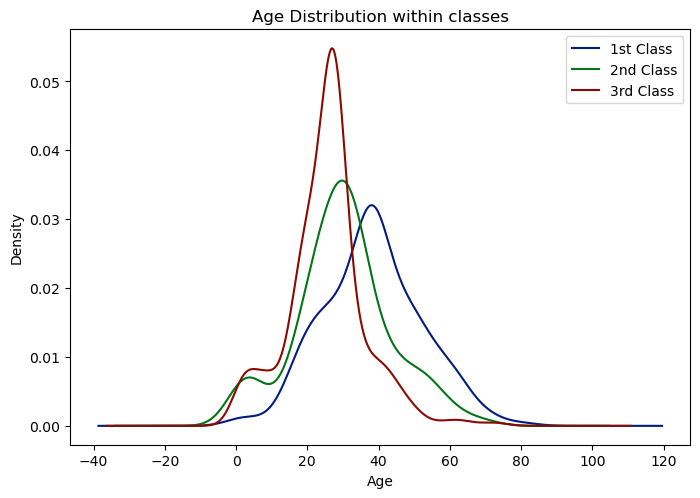

In [713]:
train_df.Age[train_df[1] == 1].plot(kind='kde')    
train_df.Age[train_df[2] == 1].plot(kind='kde')
train_df.Age[train_df[3] == 1].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

# Creating new column **Alone**, with SibSp and Parch columns:

In [714]:
withme=np.zeros(891,)
for i in range(891):
    withme[i]=train_df["SibSp"][i] + train_df["Parch"][i]
#withme.unique()

In [715]:
train_df["Withme"]= withme

In [716]:
def make_discrete(Withme):
    if Withme < 1:
        return 1
    else:
        return 0
train_df['alone'] = train_df["Withme"].apply(make_discrete)
train_df.groupby("alone")["Withme"].count()

alone
0    354
1    537
Name: Withme, dtype: int64

In [717]:
train_df.head()

,Survived,Name,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S,1,2,3,Withme,alone
0,0,"Braund, Mr. Owen Harris",22.000000000000000,1,0,7.250000000000000,S,0,1,0,0,1,0,0,1,1.000000000000000,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000000000000,1,0,71.283299999999997,C,1,0,1,0,0,1,0,0,1.000000000000000,0
2,1,"Heikkinen, Miss. Laina",26.000000000000000,0,0,7.925000000000000,S,1,0,0,0,1,0,0,1,0.000000000000000,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000000000000,1,0,53.100000000000001,S,1,0,0,0,1,1,0,0,1.000000000000000,0
4,0,"Allen, Mr. William Henry",35.000000000000000,0,0,8.050000000000001,S,0,1,0,0,1,0,0,1,0.000000000000000,1


=>>> 790 people are alone.

So, we can drop Withme, SibSp and Parch columns.

In [718]:
train_df.drop(labels = ["Withme"], axis = 1, inplace = True)

In [719]:
train_df.drop(labels = ["SibSp", "Parch"], axis = 1, inplace = True)
#train_df.head()

# Modifying Name column as **Miss,Mrs, and Others prefix.**

In [720]:
train_df["Name"].replace(to_replace='(.*, )|(\\..*)', value='', inplace=True, regex=True)

In [721]:
train_df["Name"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [722]:
other_titles = ['Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Master']
train_df.replace(other_titles, "Others", inplace=True)
train_df.replace(["Mlle","Ms", "Mme"], ["Miss", "Miss", "Mrs"], inplace=True)

In [723]:
train_df

,Survived,Name,Age,Fare,Embarked,female,male,C,Q,S,1,2,3,alone
0,0,Mr,22.000000000000000,7.250000000000000,S,0,1,0,0,1,0,0,1,0
1,1,Mrs,38.000000000000000,71.283299999999997,C,1,0,1,0,0,1,0,0,0
2,1,Miss,26.000000000000000,7.925000000000000,S,1,0,0,0,1,0,0,1,1
3,1,Mrs,35.000000000000000,53.100000000000001,S,1,0,0,0,1,1,0,0,0
4,0,Mr,35.000000000000000,8.050000000000001,S,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Others,27.000000000000000,13.000000000000000,S,0,1,0,0,1,0,1,0,1
887,1,Miss,19.000000000000000,30.000000000000000,S,1,0,0,0,1,1,0,0,1
888,0,Miss,24.912698412698411,23.449999999999999,S,1,0,0,0,1,0,0,1,0
889,1,Mr,26.000000000000000,30.000000000000000,C,0,1,1,0,0,1,0,0,1


# Visualize

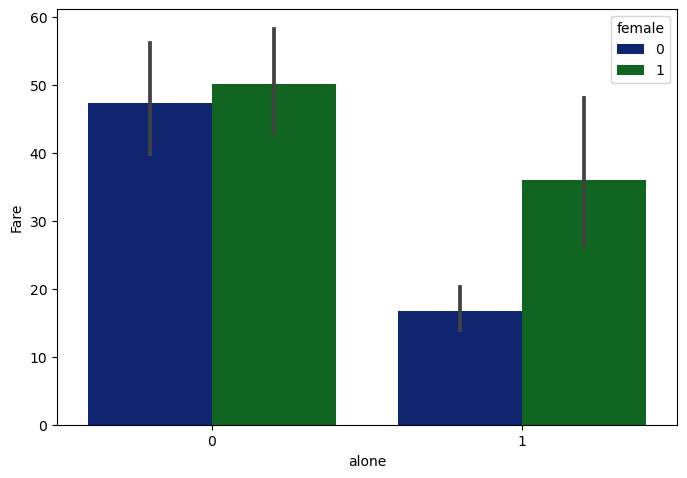

In [724]:
sns.barplot(x="alone", y="Fare", data=train_df, hue = 'female')
plt.show()

In [725]:
#plt.figure(figsize=(5,3), dpi = 300)
#sns.scatterplot(x="Age", y="Fare", data=train_df, hue = 'male')

# Age and Female for 1.Pclass and 3. Pclass

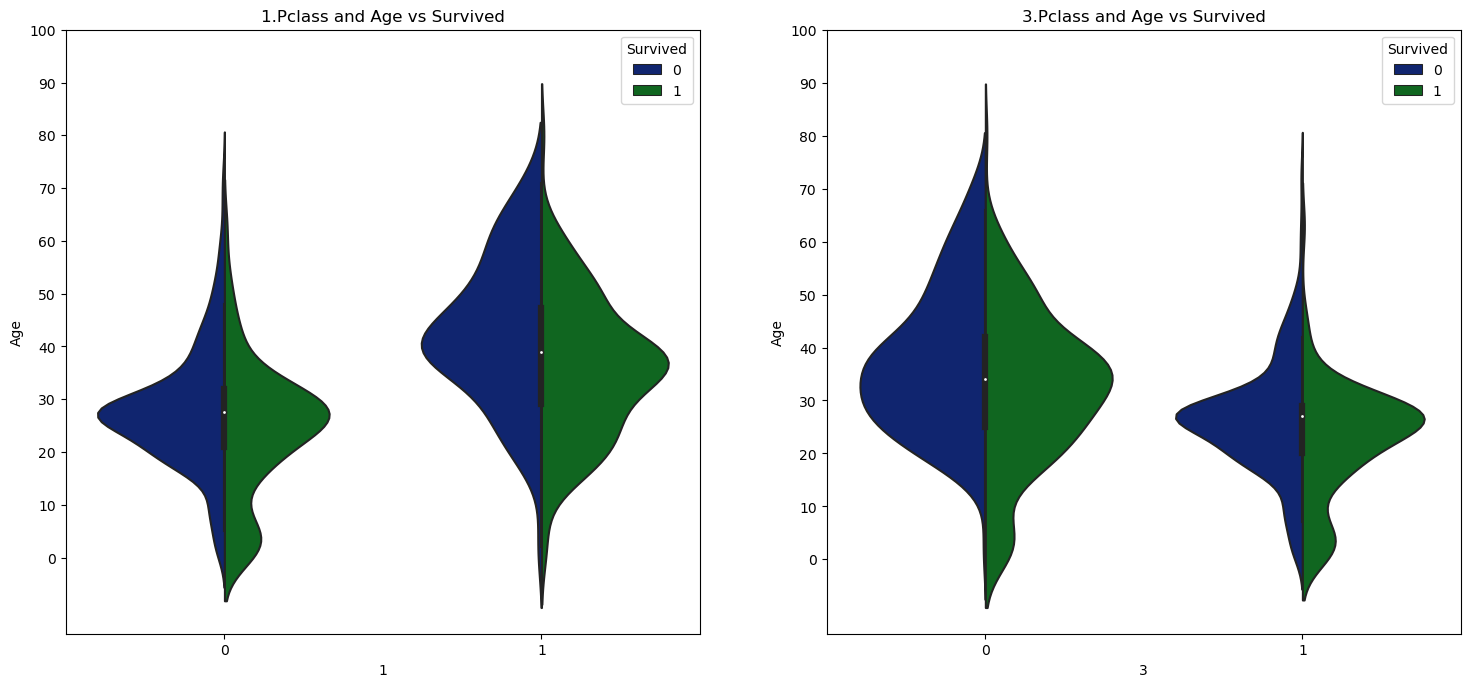

In [726]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(1,"Age", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('1.Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(3,"Age", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('3.Pclass and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

# Age distribution of survived or died people in Pclasses:

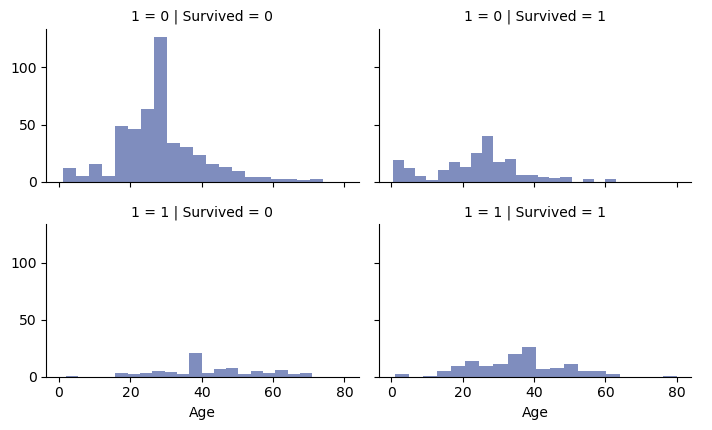

In [727]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row=1, size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## UNIVARIATE ANALYSIS

**Visualization with Univariate Data**\
Visualization of the Numerical Variables

# Visualization with Univariate Data: Age and Fare dist. and log transformed

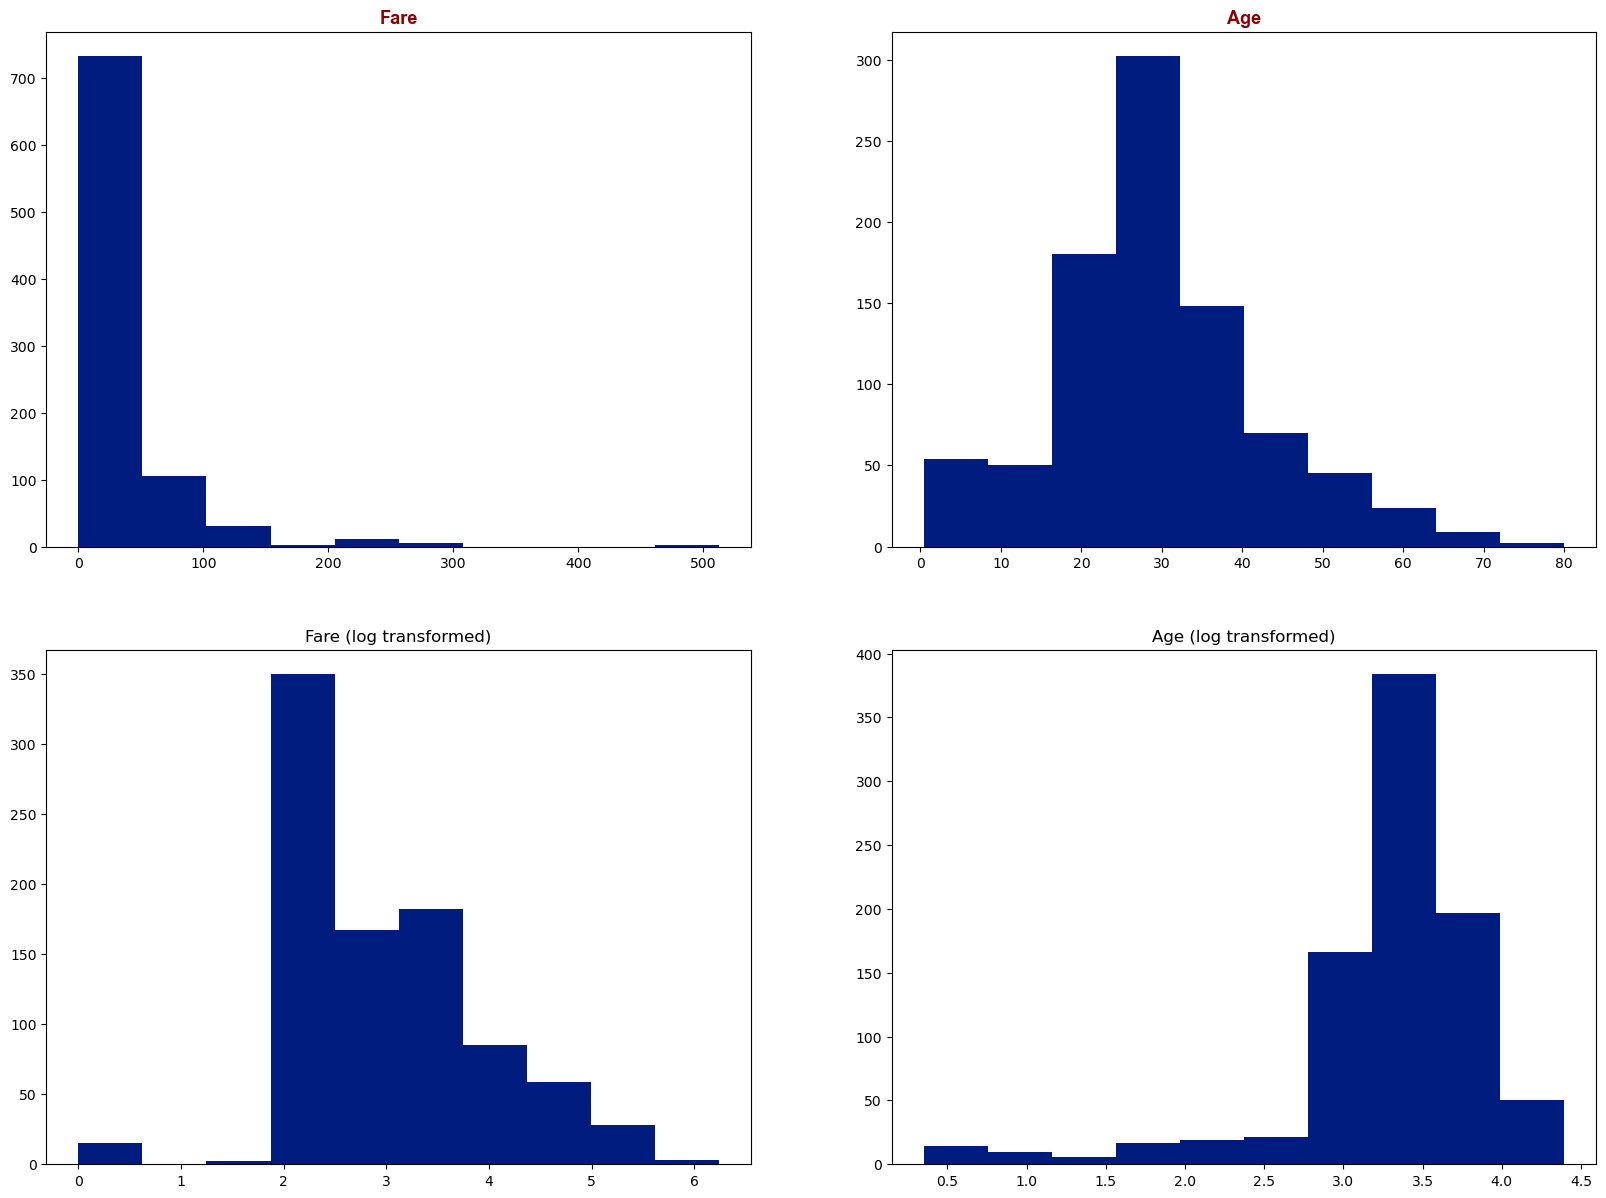

In [728]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

variables = ['Fare', 'Age']
winsorize_variables= ['Fare', 'Age']
plt.figure(figsize=(20,15))
for i in range(2):
    plt.subplot(2, 2, i+1)
    plt.hist(train_df[variables[i]])
    plt.title(variables[i], fontdict=title_font)

for i in range(2):
    plt.subplot(2, 2, i+3)
    plt.hist(np.log(train_df[variables[i]]+1))
    plt.title(variables[i] + ' (log transformed)')

# Visualization of Categorical Variables

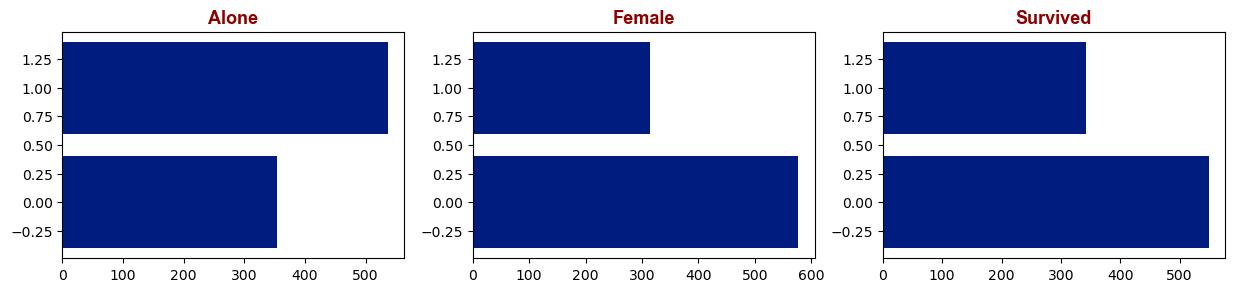

In [729]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.barh(train_df.groupby("alone")["alone"].count().index, 
        train_df.groupby("alone")["alone"].count())
plt.title("Alone", fontdict=title_font)
plt.subplot(1,3,2)
plt.barh(train_df.groupby("female")["female"].count().index, 
        train_df.groupby("female")["female"].count())
plt.title("Female", fontdict=title_font)
plt.subplot(1,3,3)
plt.barh(train_df.groupby("Survived")["Survived"].count().index, 
        train_df.groupby("Survived")["Survived"].count())
plt.title("Survived", fontdict=title_font)

plt.show()

In [730]:
#!pip install wordcloud

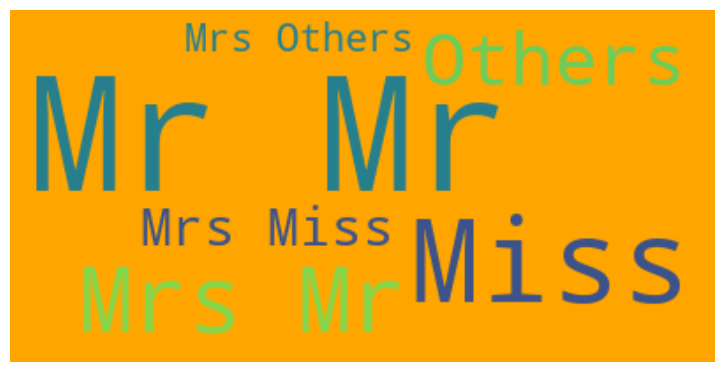

In [731]:
from wordcloud import WordCloud
categories=['Name']
plt.figure(figsize=(20,10))
for i, category in enumerate(categories):
    plt.subplot(1,2,i+1)
    wordcloud = WordCloud(background_color="orange").generate(" ".join(train_df[category].dropna()))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
plt.show()

#  Bivariate Analysis of Two Continuous Variables Fare vs Age and Female

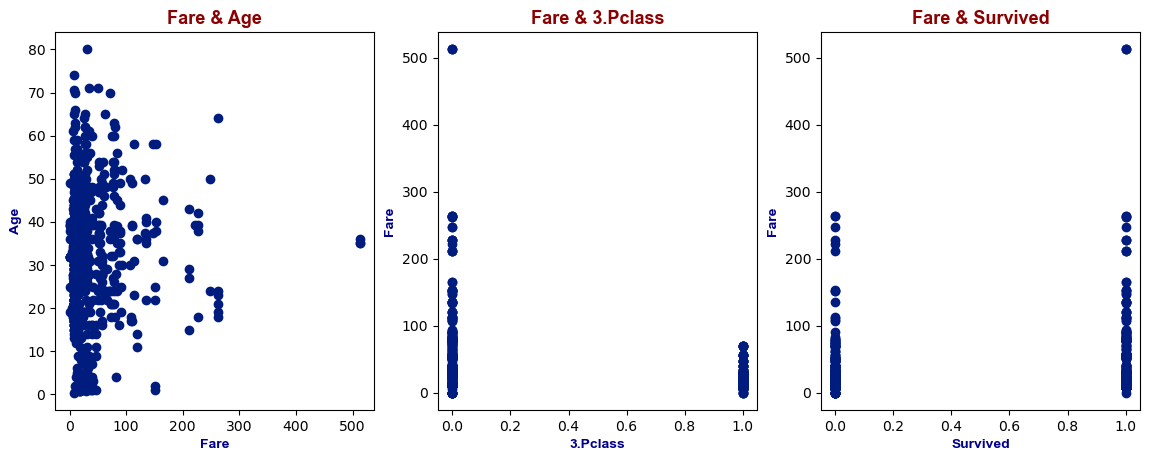

In [732]:
plt.figure(figsize=(14,5))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(train_df["Fare"], train_df["Age"])
plt.title("Fare & Age", fontdict=title_font)
plt.xlabel('Fare', fontdict=axis_font )
plt.ylabel('Age', fontdict=axis_font )
plt.subplot(1,3,2)
plt.scatter(train_df[3], train_df["Fare"])
plt.title("Fare & 3.Pclass", fontdict=title_font)
plt.xlabel('3.Pclass', fontdict=axis_font )
plt.ylabel('Fare', fontdict=axis_font )
plt.subplot(1,3,3)
plt.scatter(train_df["Survived"], train_df["Fare"])
plt.title("Fare & Survived", fontdict=title_font)
plt.xlabel('Survived', fontdict=axis_font )
plt.ylabel('Fare', fontdict=axis_font )
plt.show()

0-10 years people do not pay more then 150 euro for ticket. On the other hand, 500 euro of ticket is belong for apporoximately 35 and 67 years old passengers.

3.Pclass passengers has less fare of ticket.

Small group of survived people has the most fare.

# Bivariate Analysis of Two Categoric Variables: Survived and Female

In [733]:
survfem = pd.crosstab(train_df.Survived, train_df.female)
survfem

female,0,1
Survived,,
0,468,81
1,109,233


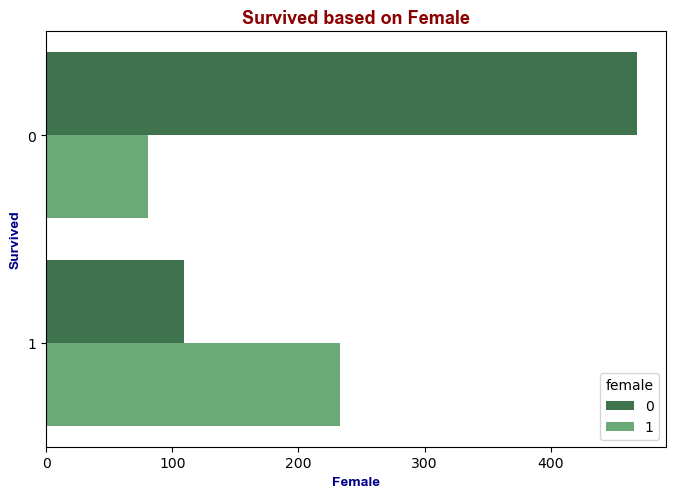

In [734]:
sns.countplot(y="Survived", hue="female", data=train_df, palette="Greens_d")
plt.title("Survived based on Female", fontdict = title_font)
plt.ylabel("Survived", fontdict = axis_font)
plt.xlabel("Female", fontdict = axis_font)
plt.show()

# Outlier Detection

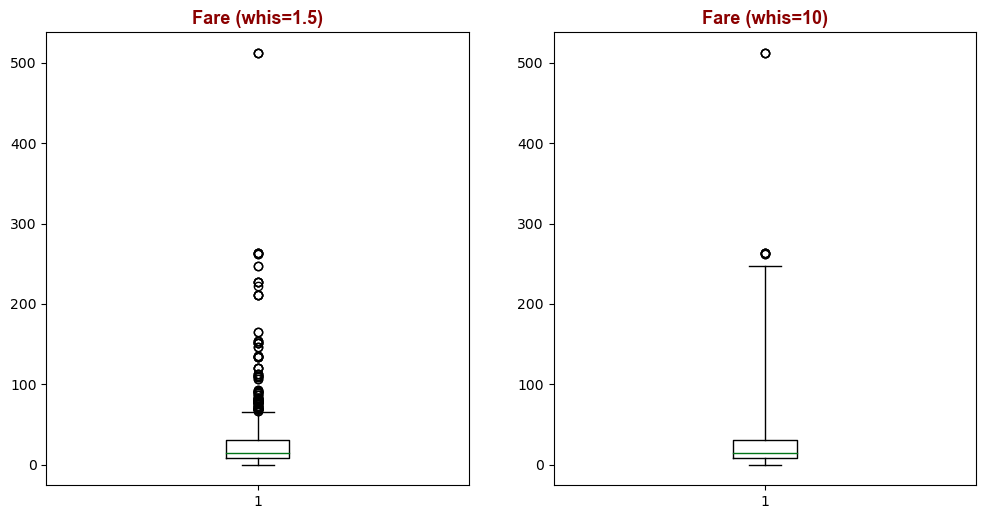

In [735]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.boxplot(train_df.Fare.dropna())
plt.title("Fare (whis=1.5)", fontdict=title_font)
plt.subplot(1,2,2)
plt.boxplot(train_df.Fare.dropna(), whis=10)
plt.title("Fare (whis=10)", fontdict=title_font)
plt.show()

The number of outliers has decreased in right graph, because we kept the threshold quite high. 

In [736]:
from scipy.stats import zscore

z_scores = zscore(train_df["Fare"].dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 73
------
Threshold value: 2
Number of Outliers: 38
------
Threshold value: 3
Number of Outliers: 20
------
Threshold value: 4
Number of Outliers: 11
------


When the threshold values of z-score increases, number of outliers decreases. 

# Classifying the Outliers

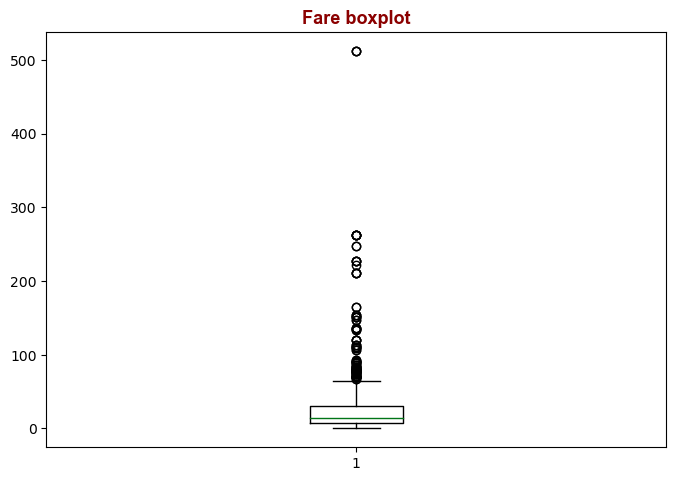

In [737]:
plt.boxplot(train_df.Fare.dropna())
plt.title("Fare boxplot", fontdict=title_font)
plt.show()

In [738]:
from scipy.stats.mstats import winsorize

winsorizing= winsorize(np.array(train_df.Fare.dropna()), (0.10, 0.10))
winsorizing

masked_array(data=[ 7.55  , 71.2833,  7.925 , 53.1   ,  8.05  ,  8.4583,
                   51.8625, 21.075 , 11.1333, 30.0708, 16.7   , 26.55  ,
                    8.05  , 31.275 ,  7.8542, 16.    , 29.125 , 13.    ,
                   18.    ,  7.55  , 26.    , 13.    ,  8.0292, 35.5   ,
                   21.075 , 31.3875,  7.55  , 77.9583,  7.8792,  7.8958,
                   27.7208, 77.9583,  7.75  , 10.5   , 77.9583, 52.    ,
                    7.55  ,  8.05  , 18.    , 11.2417,  9.475 , 21.    ,
                    7.8958, 41.5792,  7.8792,  8.05  , 15.5   ,  7.75  ,
                   21.6792, 17.8   , 39.6875,  7.8   , 76.7292, 26.    ,
                   61.9792, 35.5   , 10.5   ,  7.55  , 27.75  , 46.9   ,
                    7.55  , 77.9583, 77.9583, 27.9   , 27.7208, 15.2458,
                   10.5   ,  8.1583,  7.925 ,  8.6625, 10.5   , 46.9   ,
                   73.5   , 14.4542, 56.4958,  7.65  ,  7.8958,  8.05  ,
                   29.    , 12.475 ,  9.    ,  9.5 

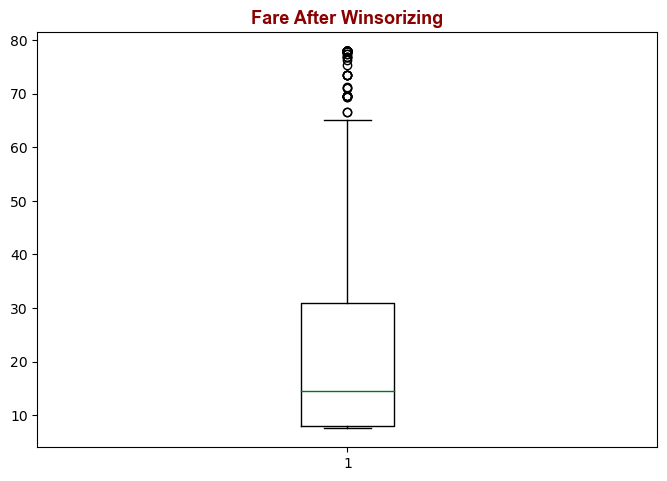

In [739]:
plt.boxplot(winsorizing)
plt.title("Fare After Winsorizing", fontdict=title_font)
plt.show()

In [740]:
np.percentile(train_df.Fare.dropna(),[10,90])

array([ 7.55  , 77.9583])

The 10% of the lowest value (i.e., values lower than 7.55) and the 10% of the highest values (i.e., values larger than 77.9583) are replaced. 

# t-test

In [741]:
train_df.dropna(inplace=True)

In [742]:
# Test whether group differences are significant.
train_dfs = train_df["Survived"].unique()
grup_train = train_df.groupby("Survived")

In [743]:
from scipy.stats import ttest_ind
ttest_value = ttest_ind(train_df.Survived, train_df.female, equal_var=False)
print(ttest_value)

Ttest_indResult(statistic=1.5277412932994745, pvalue=0.12675592927207607)


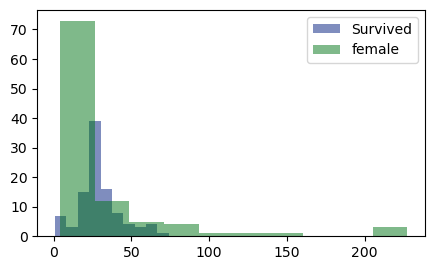

In [744]:
plt.figure(figsize=(5,3))

AGE = np.random.choice(train_df.Age, 100, replace=True)
FARE = np.random.choice(train_df.Fare, 100, replace=True)

plt.hist(AGE, alpha=0.5, label='Survived') 
plt.hist(FARE, alpha=0.5, label='female') 
plt.legend(loc='upper right') 
plt.show()

In [745]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["Survived", "female"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(train_dfs)):
        for j in range(i+1, len(train_dfs)):
            ttest = stats.ttest_ind(train_df[train_df["alone"]==train_dfs[i]][var], 
                                train_df[train_df["alone"]==train_dfs[j]][var])
            group_1 = train_dfs[i]
            group_2 = train_dfs[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison Survived

,group_1,group_2,statistic,p_value
0,0.000000000000000,1.000000000000000,6.470197793420181,0.000000000162100


For the sake of comparison female

,group_1,group_2,statistic,p_value
0,0.000000000000000,1.000000000000000,9.519564757603474,0.000000000000000


**Correlation Coefficient**

In [746]:
train_df.drop(labels =["Embarked","Name","Q",2], axis = 1, inplace = True)

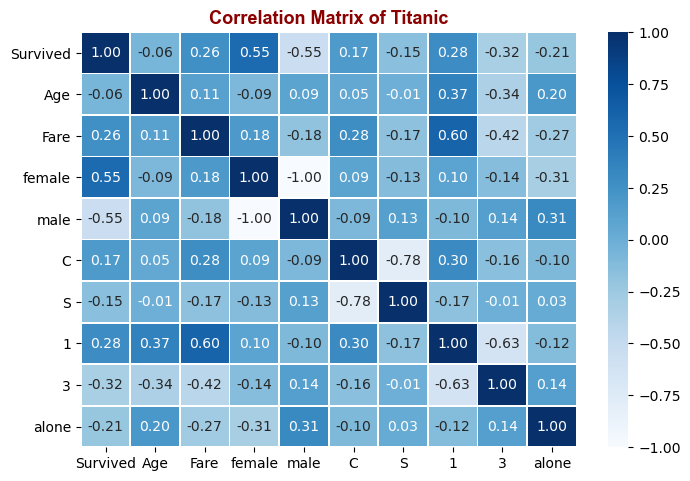

In [747]:
train_df_map=train_df.corr()
sns.heatmap(train_df_map, annot=True, fmt='.2f', annot_kws={"size": 10}, linewidths=.5, vmin=-1, vmax=1, cmap= "Blues")
plt.title("Correlation Matrix of Titanic", fontdict=title_font)

plt.show()

In [748]:
train_df

,Survived,Age,Fare,female,male,C,S,1,3,alone
0,0,22.000000000000000,7.250000000000000,0,1,0,1,0,1,0
1,1,38.000000000000000,71.283299999999997,1,0,1,0,1,0,0
2,1,26.000000000000000,7.925000000000000,1,0,0,1,0,1,1
3,1,35.000000000000000,53.100000000000001,1,0,0,1,1,0,0
4,0,35.000000000000000,8.050000000000001,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000000000000,13.000000000000000,0,1,0,1,0,0,1
887,1,19.000000000000000,30.000000000000000,1,0,0,1,1,0,1
888,0,24.912698412698411,23.449999999999999,1,0,0,1,0,1,0
889,1,26.000000000000000,30.000000000000000,0,1,1,0,1,0,1


In [749]:
train_df.Age=train_df.Age.astype(int) 

In [750]:
for i in range(159):
    if train_df.Age[i]<20:
        train_df.Age[i]=0
    elif train_df.Age[i]>=20 and train_df.Age[i]<45:
        train_df.Age[i]=1
    else:
        train_df.Age[i]=2

In [751]:
for i in range(159):
    if train_df.Fare[i]<20:
        train_df.Fare[i]=0
    elif train_df.Fare[i]>=30 and train_df.Fare[i]<45:
        train_df.Fare[i]=1
    else:
        train_df.Fare[i]=2

In [752]:
train_df.head()

,Survived,Age,Fare,female,male,C,S,1,3,alone
0,0,1,0.000000000000000,0,1,0,1,0,1,0
1,1,1,2.000000000000000,1,0,1,0,1,0,0
2,1,1,0.000000000000000,1,0,0,1,0,1,1
3,1,1,2.000000000000000,1,0,0,1,1,0,0
4,0,1,0.000000000000000,0,1,0,1,0,1,1


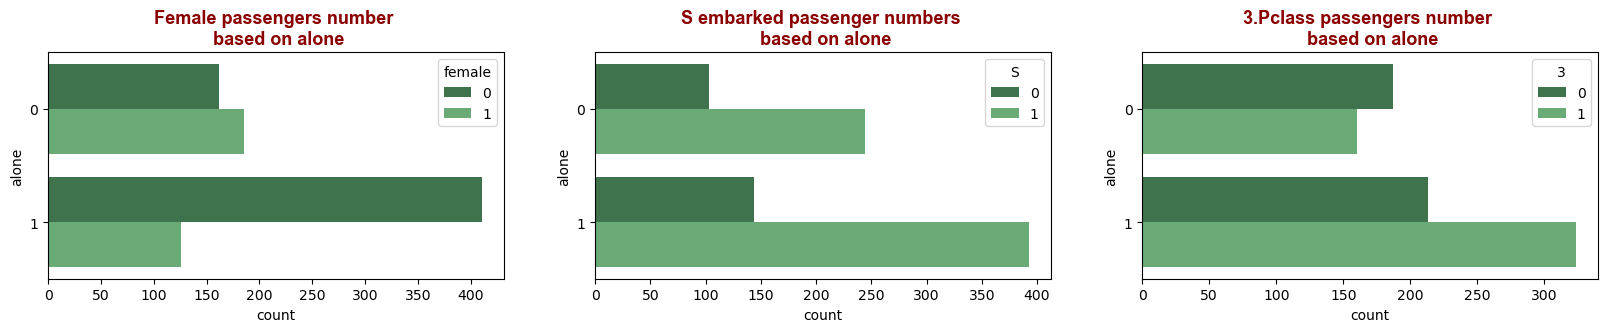

In [753]:
plt.figure(figsize=(20,3))
plt.subplot(1,3,1)
sns.countplot(y="alone", hue="female", data=train_df, palette="Greens_d")
plt.title("Female passengers number \n based on alone", fontdict = title_font)
#plt.ylabel("alone", fontdict = axis_font)
plt.subplot(1,3,2)
sns.countplot(y="alone", hue="S", data=train_df, palette="Greens_d")
plt.title("S embarked passenger numbers \n based on alone", fontdict = title_font)
#plt.ylabel("alone", fontdict = axis_font)
plt.subplot(1,3,3)
sns.countplot(y="alone", hue=3, data=train_df, palette="Greens_d")
plt.title("3.Pclass passengers number \n based on alone", fontdict = title_font)
#plt.ylabel("alone", fontdict = axis_font)
plt.show()

Most alone passengers are male.

Most alone passengers are embarked C port.

Most alone passengers had 3.Pclass ticked.

In [754]:
train_df.groupby("female")["alone"].count()

female
0    573
1    311
Name: alone, dtype: int64

# Age group based on alone

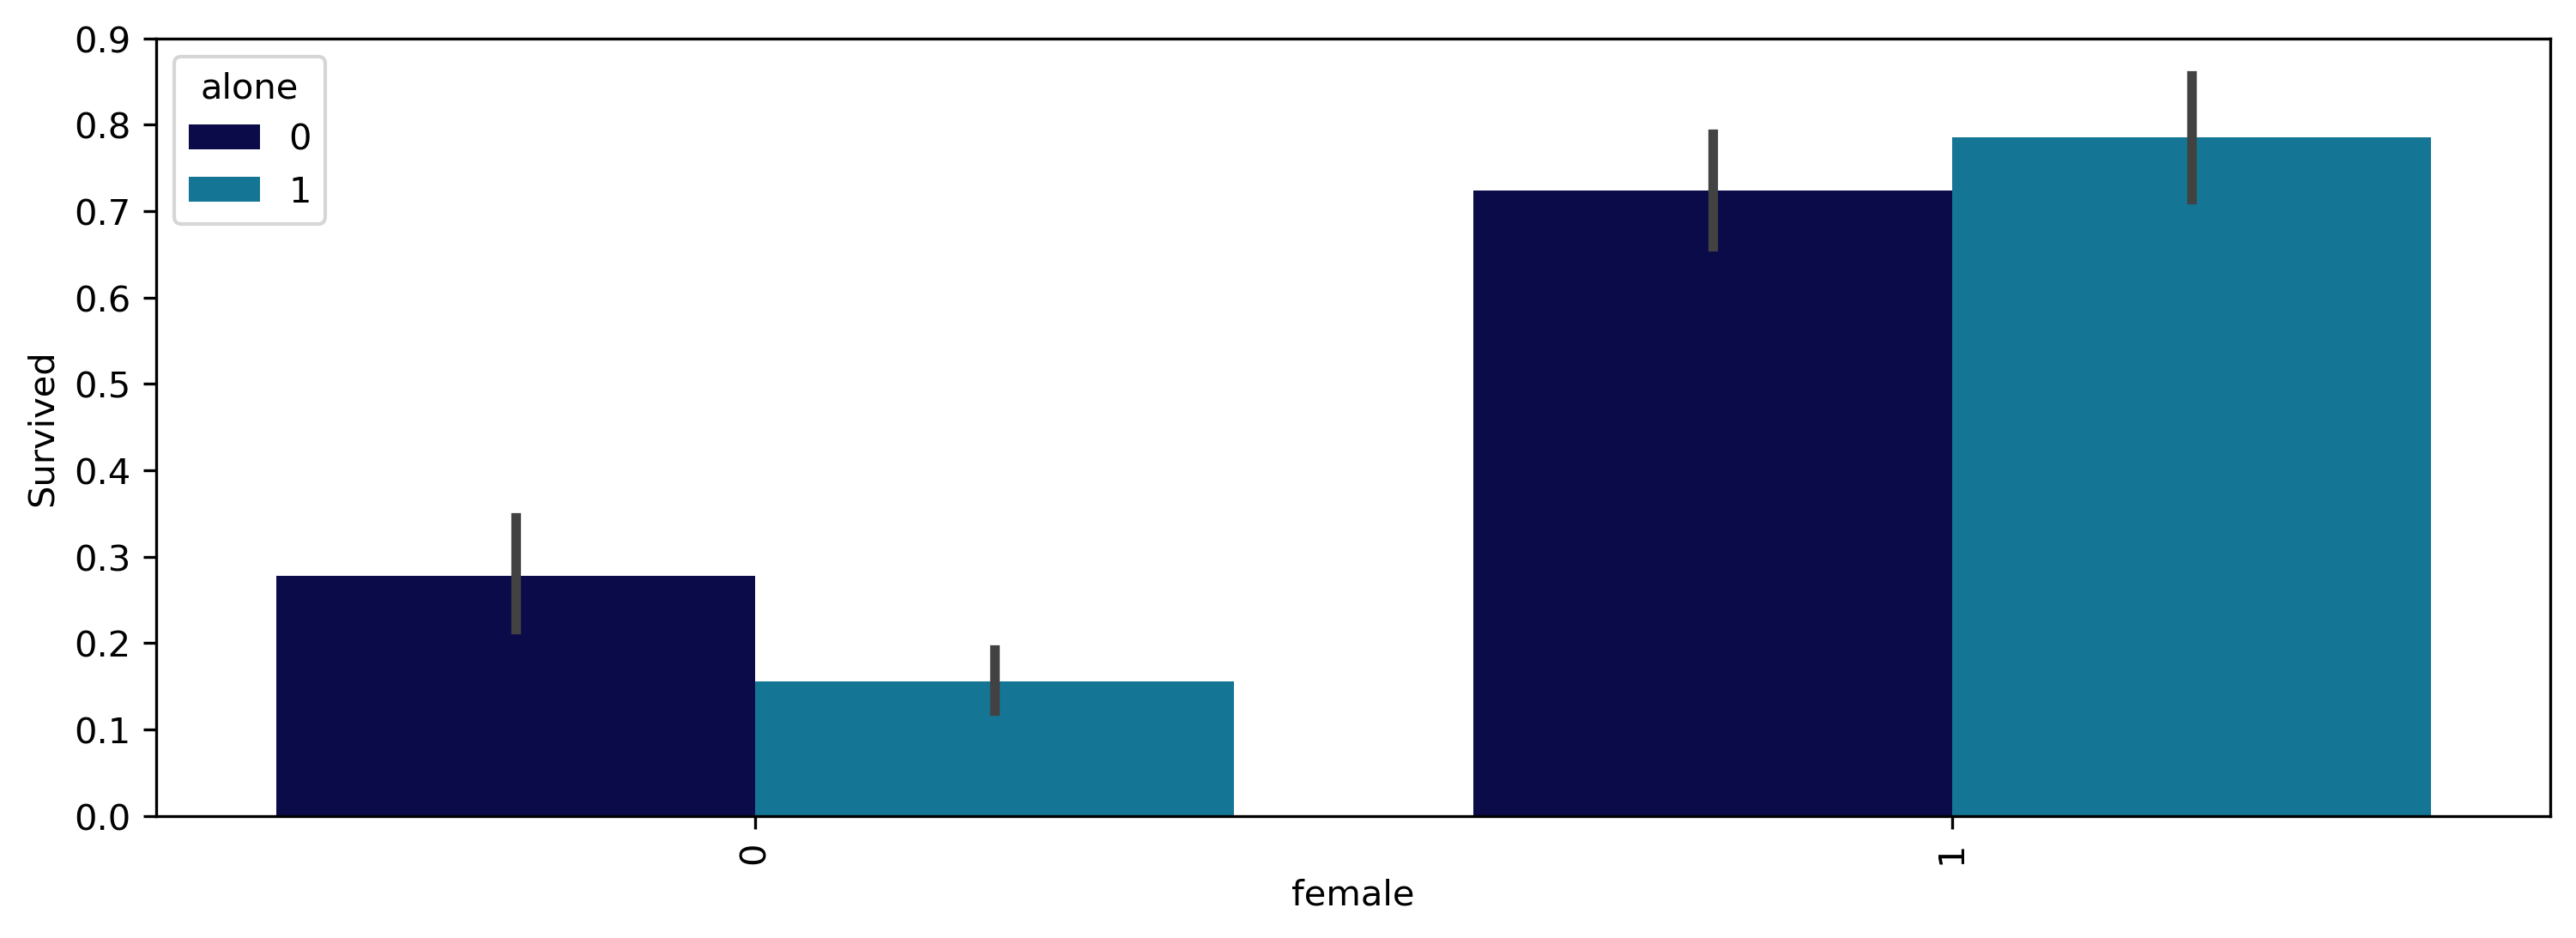

In [755]:
plt.figure(figsize=(12,4), dpi = 300)
sns.barplot(x = 'female', y = 'Survived', data = train_df, hue = 'alone', palette = 'ocean')
plt.xticks(rotation = 90)
plt.show()

Alone and female passengers most survived.

## Last correlation of Titanic

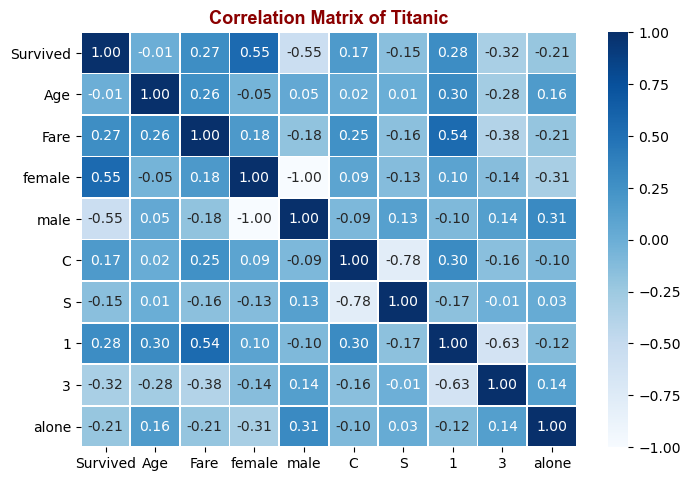

In [756]:
train_df_map=train_df.corr()
sns.heatmap(train_df_map, annot=True, fmt='.2f', annot_kws={"size": 10}, linewidths=.5, vmin=-1, vmax=1, cmap= "Blues")
plt.title("Correlation Matrix of Titanic", fontdict=title_font)

plt.show()